 Stufe 1: versuche den Code zu verstehen und bringe ihn zum  Laufen
 	gib die Geradensteigung aus und vergleiche mit der Grafik
 Stufe 2a: erzeuge aus dem Code eine Klasse
 	bei welchen Funktionen ändern sich die Parameter?
 	Experimentiere mit geänderter Lernrate und geänderter Abbruchbedingung
 	für die Konvergenz. (Sie müsste nicht 0 werden)
 Stufe 3a: Baue ein Perceptron für Eingabedaten mit 5 Komponenten.
 	Trainiere das Perceptron so, dass der Output eine 1 ist,
 	falls irgend eine Komponente 1 ist.(=erweitertes Oder)
 	Was sind die Gewichte?
 	Fange mit 10 Trainingsdaten an.
 	Wieviele braucht man um sinnvolle Ergebnisse zu bekommen?
 	Tipp: erzeuge die Trainings und evtl Testdaten mit randint(0,1)
 Stufe 3b
 	Versuche Frochtes Abbildung 7.3 zu verstehen,
 indem du versuchsweise aus Stufe 1 eine Geradensteigung und ein Theta berechnest

 # Imports:

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import mlalfa.neural_networks as nn
from mlalfa.neural_networks import OneLayerPerceptron
from IPython import get_ipython
if type(get_ipython()).__name__ == 'ZMQInteractiveShell':  # IPython Notebook!
    get_ipython().run_line_magic('matplotlib', 'inline')  # '%matplotlib inline'
    get_ipython().run_line_magic('load_ext', 'autoreload')  # '%load_ext autoreload'
    get_ipython().run_line_magic('autoreload', '2')  # '%autoreload 2' (reloads everything)
# Change working directory to file location:
os.chdir(R'C:\Users\Jan\Projects\mlalfa\scripts')
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)
np.random.seed(42)



 # Code directly from Frochte:

In [2]:

dataset = np.loadtxt(os.path.join('data', 'Autoklassifizierung.csv'), delimiter=',')

y = dataset[:, 0]
X = np.ones((len(y), 3))
X[:, 0:2] = dataset[:, 1:3]

X_min = X[:, 0:2].min(axis=0)
X_max = X[:, 0:2].max(axis=0)
X[:, 0:2] = (X[:, 0:2] - X_min) / (X_max - X_min)
t = 0
tmax = 100000
eta = 0.25
Dw = np.zeros(3)
w = np.random.rand(3) - 0.5
convergence = 1


def heaviside(X):
    y = np.ones_like(X, dtype=np.float)
    y[X <= 0] = 0
    return(y)


while (convergence > 0) and (t < tmax):
    t += 1
    chosen_sample = np.random.randint(len(y))
    xB = X[chosen_sample, :].T
    yB = y[chosen_sample]
    error = yB - heaviside(w@xB)
    for j in range(len(xB)):
        Dw[j] = eta * error * xB[j]
        w[j] = w[j] + Dw[j]
    convergence = np.linalg.norm(y-heaviside(w@X.T))


def predict(X, w, X_min, X_max):
    xC = np.ones((X.shape[0], 3))
    xC[:, 0:2] = X
    xC[:, 0:2] = (xC[:, 0:2] - X_min) / (X_max - X_min)
    print(xC)
    y = w@xC.T
    y[y > 0] = 1
    y[y <= 0] = 0
    return(y)


# SEAT Ibiza, Sokda Octavia, Toyota Avensis und Yaris GRMN
X_test = np.array([[12490, 48],     # SEAT Ibiza
                   [31590, 169],   # Skoda Octavia
                   [24740, 97],    # Toyota Avensis
                   [30800, 156]])  # Yaris GRMN

y_predict = predict(X_test, w, X_min, X_max)
print(y_predict)



[[0.14579537 0.03333333 1.        ]
 [0.6430617  1.04166667 1.        ]
 [0.46472273 0.44166667 1.        ]
 [0.62249414 0.93333333 1.        ]]
[1. 0. 0. 0.]


 # Use own class:

In [3]:
# Load data:
np.random.seed(42)
dataset = np.loadtxt('data/Autoklassifizierung.csv', delimiter=',')
y_train = dataset[:, 0]  # Label
X_train = dataset[:, 1:3]  # Features
# Generate test data:
X_test = np.array([[12490, 48],     # SEAT Ibiza
                   [31590, 169],   # Skoda Octavia
                   [24740, 97],    # Toyota Avensis
                   [30800, 156]])  # Yaris GRMN
# Create modell:
model = OneLayerPerceptron(tmax=1000, eta=0.25, activation=nn.heaviside, random_state=42)
# Modell fitten:
model.fit(X_train, y_train)
# Modell benutzen:
y_predict = model.predict(X_test)
print(y_predict)



INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=195 steps until convergence (0.0)
[1. 0. 0. 0.]


 # Plot results:

INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=23 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=193 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=338 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=15 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=101 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=281 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=508 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=288 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=119 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=153 steps until convergence (0.0)
INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=745 steps until convergence (0.0)
I

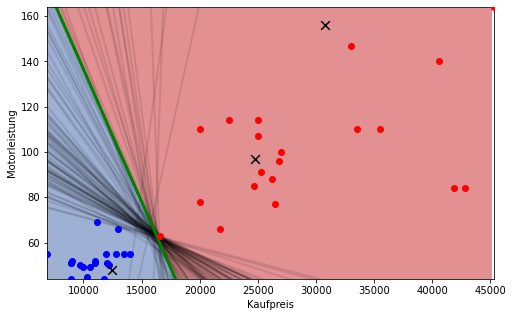

In [4]:
# Generate meshgrid:
min_x, max_x = model.X_min[0], model.X_max[0]
min_y, max_y = model.X_min[1], model.X_max[1]
xx, yy = np.meshgrid(np.arange(min_x, max_x, (max_x-min_x)/200),
                     np.arange(min_y, max_y, (max_y-min_y)/200))
# Predict all points on the meshgrid:
Z = model.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
# Plot meshgrid as contourf:
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.5)
# Split training data according to categories:
car_0 = X_train[y_train == 0, :]
car_1 = X_train[y_train == 1, :]
# Plot both with different colors:
plt.scatter(x=car_0[:, 0], y=car_0[:, 1], c='red', zorder=3)
plt.scatter(x=car_1[:, 0], y=car_1[:, 1], c='blue', zorder=3)
# Also plot the test data as black crosses:
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c='black', marker='x', s=75, zorder=4)


# Function to calculate line parameters:
def get_line_params(model):
    w = model.w
    min_x, max_x = model.X_min[0], model.X_max[0]
    min_y, max_y = model.X_min[1], model.X_max[1]
    s_x = max_x - min_x  # scale for the x values
    s_y = max_y - min_y  # scale for the y values
    # y = -wx/wy * x - wb/wx  # these are NORMALIZED x/y!
    # y = y_min - wx/wy*sy/sx*(x-x_min) - wb/wy*sy  # This is for the original x/y!
    m = -w[0]/w[1]*s_y/s_x
    b = min_y - m*min_x - w[2]/w[1]*s_y
    _log.debug(f'\nm: {m}')
    _log.debug(f'\nb: {b}')
    return m, b


# Generate and plot the fitted line (green):
m, b = get_line_params(model)
x = np.linspace(min_x, max_x)
plt.plot(x, m*x+b, color='green', linewidth=3, zorder=2)

# Also plot 100 other randomly fitted lines (black):
for i in range(100):
    model_rng = OneLayerPerceptron(random_state=i).fit(X_train, y_train)
    m_rng, b_rng = get_line_params(model_rng)
    plt.plot(x, m_rng*x+b_rng, color='black', linewidth=2, alpha=0.1, zorder=1)

# Some plot formatting:
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.xlabel('Kaufpreis')
plt.ylabel('Motorleistung')
print('\n')
print(f'm: {m}')
print(f'b: {b}')



 # Stufe 3a: Perceptron für Eingabedaten mit 5 Komponenten!

In [5]:
# Generate training data:
X_train = np.asarray([np.random.randint(2, size=5) for i in range(9)])
X_train = np.vstack((X_train, [0, 0, 0, 0, 0]))  # Make sure that we also train the zero case!
print('\nTRAINING')
for x_sample in X_train:
    print(x_sample)
# Check labels with numpy.any:
y_train = np.any(X_train, axis=1).astype(int)
# Create and fit model:
model = OneLayerPerceptron().fit(X_train, y_train)
# Check if all zeros give correct result (False):
X_test = np.zeros((5, 1), dtype=int)
y_test = np.any(X_test, axis=1).astype(int)[0]
y_predict = model.predict(X_test).astype(int)[0]
print(f'\n0-TEST: {X_test.squeeze()} --> {y_predict} | {y_test}')
# Check a lot of different cases and print the ones that are wrong:
errors = 0
total = 250
for i in range(total):
    X_test = np.random.randint(2, size=5).reshape(1, -1)
    y_test = np.any(X_test, axis=1).astype(int)[0]
    y_predict = model.predict(X_test).astype(int)[0]
    if y_predict != y_test:
        print(f'ERROR:  {X_test.squeeze()} --> {y_predict} | {y_test}')
        errors += 1
# Print error rate:
print(f'\nERRORRATE: {errors/total*100:g}%')


INFO:mlalfa.neural_networks.OneLayerPerceptron:
Needed t=15 steps until convergence (0.0)

TRAINING
[0 0 1 1 0]
[0 1 0 1 0]
[0 1 0 0 0]
[0 1 1 1 1]
[1 0 1 1 0]
[0 0 0 1 1]
[0 1 1 0 1]
[1 1 0 0 0]
[0 1 0 0 0]
[0 0 0 0 0]

0-TEST: [0 0 0 0 0] --> 0 | 0
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [0 0 0 0 1] --> 0 | 1
ERROR:  [0 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [0 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1
ERROR:  [0 0 0 0 1] --> 0 | 1
ERROR:  [1 0 0 0 1] --> 0 | 1

ERRORRATE: 5.6%
